Calculation of statistics for type of publication

In [1]:
from os import listdir
from os.path import isfile, join
import os
import pandas
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize  
onlyfiles = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f))]

In [2]:
def reader_columns_from_file(*columnNames):
    def reader(fileName):
        df = pandas.read_json(fileName, lines=True)
        return df[list(columnNames)]
    return reader

In [3]:
reader_citation_title_year = reader_columns_from_file("title", "n_citation", "year")

In [4]:
import re
dblp_part_regex = re.compile("dblp_part*")
part_files_filter_obj = filter(lambda file_name: dblp_part_regex.match(file_name), onlyfiles)

In [5]:
part_files = list(part_files_filter_obj)

In [6]:
reader_title_year_type = reader_columns_from_file("title", "year", "doc_type")

In [7]:
list_of_dataframes = list(map(reader_title_year_type, part_files))

In [8]:
df = pandas.concat(list_of_dataframes, ignore_index=True)

In [9]:
df.shape
df.columns

Index(['title', 'year', 'doc_type'], dtype='object')

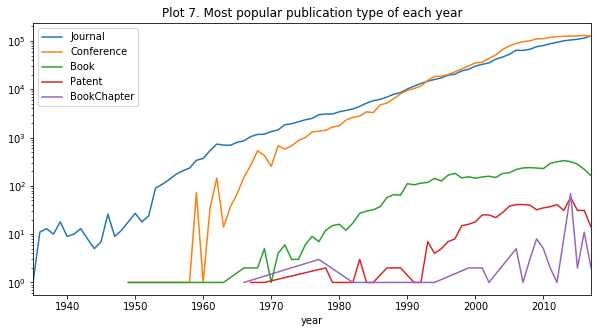

In [12]:
%matplotlib inline
types = list(filter(lambda x: x, df["doc_type"].unique()))
filtered = df.loc[df['year'] >= 1930].loc[df['year'] < 2018]
for type in types:
    amount = filtered.loc[filtered['doc_type'] == type].groupby(['year']).size()
    amount.plot(x="year", y="amount_of_publications", label=type, legend=True, title="Plot 7. Most popular publication type of each year", figsize=(10, 5))
plt.yscale("log")

In [11]:
amount_of_rows_without_doc_type = len(filtered.loc[df['doc_type'] == ""])
amount_of_all_rows = len(filtered)
percent_of_covered_data = 100 - (amount_of_rows_without_doc_type / amount_of_all_rows * 100)
percent_of_covered_data

90.74626834946899